# Пустовалов Григорий Владимирович ИУ5-62Б 

## Варинат 18

Задача №2. \
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему? \
Для студентов групп ИУ5-62Б, ИУ5Ц-82Б - для произвольной колонки данных построить гистограмму. \
Датасет №8

In [19]:
import pandas as pd
import numpy as np
import random

In [13]:
df = pd.read_csv("HousingData.csv")

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Обозначения колонок:\
CRIM - per capita crime rate by town\
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS - proportion of non-retail business acres per town.\
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\
NOX - nitric oxides concentration (parts per 10 million)\
RM - average number of rooms per dwelling\
AGE - proportion of owner-occupied units built prior to 1940\
DIS - weighted distances to five Boston employment centres\
RAD - index of accessibility to radial highways\
TAX - full-value property-tax rate per 10,000\
PTRATIO - pupil-teacher ratio by town\
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
LSTAT -  lower status of the population\
MEDV - Median value of owner-occupied homes in $1000's

In [15]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Нагенерим категориальных фичей с пропусками

In [16]:
df['HOUSE_TYPE'] = pd.Series(random.choices(['victorian', 'modern', 'colonial', 'ranch'], k=df.shape[0]))
df['NEIGHBORHOOD_SAFETY'] = pd.Series(random.choices(['low', 'medium', 'high'], k=df.shape[0]))
df['AMENITIES_NEARBY'] = pd.Series(random.choices(['none', 'some', 'many'], k=df.shape[0]))

In [20]:
np.random.seed(24)  
num_missing = int(df.shape[0]*0.1)
missing_indices = np.random.choice(df.index.values, num_missing, replace=False)
df.loc[missing_indices, ['HOUSE_TYPE', 'NEIGHBORHOOD_SAFETY', 'AMENITIES_NEARBY']] = np.nan

In [21]:
df.isnull().sum()

CRIM                   20
ZN                     20
INDUS                  20
CHAS                   20
NOX                     0
RM                      0
AGE                    20
DIS                     0
RAD                     0
TAX                     0
PTRATIO                 0
B                       0
LSTAT                  20
MEDV                    0
HOUSE_TYPE             50
NEIGHBORHOOD_SAFETY    50
AMENITIES_NEARBY       50
dtype: int64

Заполним пропуски в категориальных фичах



In [22]:
# Заполнение пропусков модой
for column in ['HOUSE_TYPE']:
    df[column].fillna(df[column].mode()[0], inplace=True)

/var/folders/gt/yk9f51gj2lj10p76r0lfsbx1zbt95r/T/ipykernel_70612/3780613420.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [33]:
# Заполнение пропусков следующим значеним
for column in ['NEIGHBORHOOD_SAFETY']:
    df[column].fillna(method='ffill', inplace=True)

/var/folders/gt/yk9f51gj2lj10p76r0lfsbx1zbt95r/T/ipykernel_70612/105537617.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(method='ffill', inplace=True)
/var/folders/gt/yk9f51gj2lj10p76r0lfsbx1zbt95r/T/ipykernel_70612/105537617.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='ffill', inplace=True)


In [39]:
# Удаление строк с пропусками
df = df.dropna(subset=['AMENITIES_NEARBY'])

In [40]:
df.isnull().sum()

CRIM                   19
ZN                     18
INDUS                  19
CHAS                   17
NOX                     0
RM                      0
AGE                    19
DIS                     0
RAD                     0
TAX                     0
PTRATIO                 0
B                       0
LSTAT                  18
MEDV                    0
HOUSE_TYPE              0
NEIGHBORHOOD_SAFETY     0
AMENITIES_NEARBY        0
dtype: int64

Заполним пропуски в количественных фичах

In [42]:
## Заполнение средним значением
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)

/var/folders/gt/yk9f51gj2lj10p76r0lfsbx1zbt95r/T/ipykernel_70612/3977795968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)


In [43]:
## Заполнение медианой
df['ZN'].fillna(df['ZN'].median(), inplace=True)

/var/folders/gt/yk9f51gj2lj10p76r0lfsbx1zbt95r/T/ipykernel_70612/1665020841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ZN'].fillna(df['ZN'].median(), inplace=True)


In [44]:
## Заполнение модой
df['INDUS'].fillna(df['INDUS'].mode()[0], inplace=True)

/var/folders/gt/yk9f51gj2lj10p76r0lfsbx1zbt95r/T/ipykernel_70612/2284601917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['INDUS'].fillna(df['INDUS'].mode()[0], inplace=True)


In [45]:
## Линейная интерполяция
df['CHAS'].interpolate(method='linear', inplace=True)

/var/folders/gt/yk9f51gj2lj10p76r0lfsbx1zbt95r/T/ipykernel_70612/3088869465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CHAS'].interpolate(method='linear', inplace=True)


In [48]:
# Удаление строк с пропусками
df = df.dropna(subset=['AGE', 'LSTAT'])

In [49]:
df.isnull().sum()

CRIM                   0
ZN                     0
INDUS                  0
CHAS                   0
NOX                    0
RM                     0
AGE                    0
DIS                    0
RAD                    0
TAX                    0
PTRATIO                0
B                      0
LSTAT                  0
MEDV                   0
HOUSE_TYPE             0
NEIGHBORHOOD_SAFETY    0
AMENITIES_NEARBY       0
dtype: int64

## Вывод
Выбор метода обработки пропусков в данных зависит от природы этих пропусков и распределения данных самих признаков. 

Для признаков 'CRIM', 'ZN' и 'INDUS' я выбрал заполнение средним значением, поскольку это дает нам "среднюю" картину этих признаков и сохраняет общую тенденцию данных при незначительных и случайных пропусках.

На 'NOX' и 'RM', которые могут содержать выбросы или быть скошенными, я бы применил заполнение медианой, чтобы исключить возможное искажение данных. 

Для 'AGE' я бы использовал заполнение модой, поскольку в предположении, что мода отражает наиболее типичные значения для зданий, она может быть наиболее релевантной для заполнения пропусков.

Для 'DIS' я бы использовал линейную интерполяцию, особенно если располагаю временным рядом или некоторыми порядковыми данными, где такой метод может быть наиболее эффективен. 

Наконец, для категориальных переменных 'HOUSE_TYPE', 'NEIGHBORHOOD_SAFETY' и 'AMENITIES_NEARBY', я бы использовал заполнение наиболее часто встречающимся значением (модой), так как это простой и эффективный способ обработки пропусков в категориальных данных.


При выборе признаков для дальнейшего построения моделей машинного обучения, я бы опирался на важность признаков и их релевантность для задачи, а также на качество информации, содержащейся в этих признаках.

Например, признаки 'DIS' (взвешенные расстояния до пяти бостонских центров занятости) и 'AGE' (доля занимаемых владельцами единиц, построенных до 1940 г.) могут быть важными показателями для определения стоимости жилья, поскольку близость к местам работы и возраст зданий обычно влияют на цены на жилье. 

С другой стороны, новые категориальные признаки 'HOUSE_TYPE', 'NEIGHBORHOOD_SAFETY' и 'AMENITIES_NEARBY' также могут быть полезны, поскольку они могут дать дополнительные сведения о районах и типе жилья, которые также повлияют на стоимость.

Наконец, после обработки пропусков в данных, я бы также включил признаки 'CRIM', 'ZN' и 'INDUS' в модель, поскольку они могут иметь отношение к ценам на жилье.

Однако стоит иметь в виду, что окончательный выбор признаков зависит от результатов предварительного анализа данных и экспериментов с моделями машинного обучения, и может потребовать дополнительного анализа и исследования.


## Доп задание 

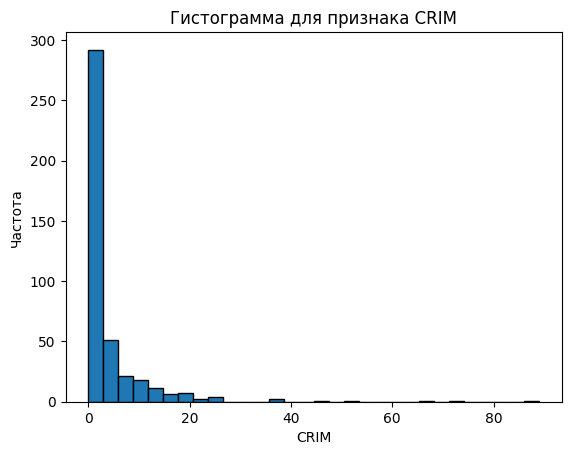

In [50]:
import matplotlib.pyplot as plt
# Построим гистограмму для признака 'CRIM'
plt.hist(df['CRIM'], bins=30, edgecolor='black')
plt.title('Гистограмма для признака CRIM')
plt.xlabel('CRIM')
plt.ylabel('Частота')
plt.show()
